In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./data/grade/KL_grade_kfold_FINAL.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   File_name_pic  8261 non-null   object
 1   real_xml       8261 non-null   object
 2   KL0            8261 non-null   int64 
 3   KL1            8261 non-null   int64 
 4   KL2            8261 non-null   int64 
 5   KL3            8261 non-null   int64 
 6   KL4            8261 non-null   int64 
 7   KL_Grade       8261 non-null   int64 
 8   fold           8261 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 581.0+ KB


,File_name_pic,real_xml,KL0,KL1,KL2,KL3,KL4,KL_Grade,fold
0,00000104_1.jpg,00000104_1.xml,1,0,0,0,0,0,5
1,00000104_2.jpg,00000104_2.xml,1,0,0,0,0,0,1
2,00000204_1.jpg,00000204_1.xml,1,0,0,0,0,0,5
3,00000204_2.jpg,00000204_2.xml,1,0,0,0,0,0,3
4,00000304_1.jpg,00000304_1.xml,0,0,1,0,0,2,5
...,...,...,...,...,...,...,...,...,...
8256,00000296_0.jpg,00000296_0.xml,0,0,0,0,1,4,2
8257,00000297_0.jpg,00000297_0.xml,0,0,0,0,1,4,4
8258,00000298_0.jpg,00000298_0.xml,0,0,0,0,1,4,2
8259,00000299_0.jpg,00000299_0.xml,0,0,0,0,1,4,2


In [7]:
df_temp = df.drop(['fold'], axis =1)
df_temp

,File_name_pic,real_xml,KL0,KL1,KL2,KL3,KL4,KL_Grade
0,00000104_1.jpg,00000104_1.xml,1,0,0,0,0,0
1,00000104_2.jpg,00000104_2.xml,1,0,0,0,0,0
2,00000204_1.jpg,00000204_1.xml,1,0,0,0,0,0
3,00000204_2.jpg,00000204_2.xml,1,0,0,0,0,0
4,00000304_1.jpg,00000304_1.xml,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...
8256,00000296_0.jpg,00000296_0.xml,0,0,0,0,1,4
8257,00000297_0.jpg,00000297_0.xml,0,0,0,0,1,4
8258,00000298_0.jpg,00000298_0.xml,0,0,0,0,1,4
8259,00000299_0.jpg,00000299_0.xml,0,0,0,0,1,4


In [8]:
df_idx = df_temp[df_temp['KL_Grade']==1].index
df_temp = df_temp.drop(df_idx)
df_idx = (df_temp[df_temp['KL_Grade']==3]).index
df_temp = df_temp.drop(df_idx)
# for i in range(len(df)):
#     if df.iloc[i, 'grade'] == 3:
        
#df_temp = df.drop([3], level = 6)
df_temp

,File_name_pic,real_xml,KL0,KL1,KL2,KL3,KL4,KL_Grade
0,00000104_1.jpg,00000104_1.xml,1,0,0,0,0,0
1,00000104_2.jpg,00000104_2.xml,1,0,0,0,0,0
2,00000204_1.jpg,00000204_1.xml,1,0,0,0,0,0
3,00000204_2.jpg,00000204_2.xml,1,0,0,0,0,0
4,00000304_1.jpg,00000304_1.xml,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...
8256,00000296_0.jpg,00000296_0.xml,0,0,0,0,1,4
8257,00000297_0.jpg,00000297_0.xml,0,0,0,0,1,4
8258,00000298_0.jpg,00000298_0.xml,0,0,0,0,1,4
8259,00000299_0.jpg,00000299_0.xml,0,0,0,0,1,4


In [9]:
df_temp = df_temp.reset_index(drop=True)
df_temp

,File_name_pic,real_xml,KL0,KL1,KL2,KL3,KL4,KL_Grade
0,00000104_1.jpg,00000104_1.xml,1,0,0,0,0,0
1,00000104_2.jpg,00000104_2.xml,1,0,0,0,0,0
2,00000204_1.jpg,00000204_1.xml,1,0,0,0,0,0
3,00000204_2.jpg,00000204_2.xml,1,0,0,0,0,0
4,00000304_1.jpg,00000304_1.xml,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...
5447,00000296_0.jpg,00000296_0.xml,0,0,0,0,1,4
5448,00000297_0.jpg,00000297_0.xml,0,0,0,0,1,4
5449,00000298_0.jpg,00000298_0.xml,0,0,0,0,1,4
5450,00000299_0.jpg,00000299_0.xml,0,0,0,0,1,4


In [10]:
print(df_temp['KL_Grade'].value_counts().sort_index())

# print('Grade 0 : {}'.format((df['KL0']==1).sum()))
# print('Grade 1 : {}'.format((df['KL1']==1).sum()))
# print('Grade 2 : {}'.format((df['KL2']==1).sum()))
# print('Grade 3 : {}'.format((df['KL3']==1).sum()))
# print('Grade 4 : {}'.format((df['KL4']==1).sum()))

0    2507
2    2352
4     593
Name: KL_Grade, dtype: int64


([<matplotlib.axis.XTick at 0x2188629e4e0>,
 [Text(0, 0, '0'), Text(1, 0, '2'), Text(2, 0, '4')])

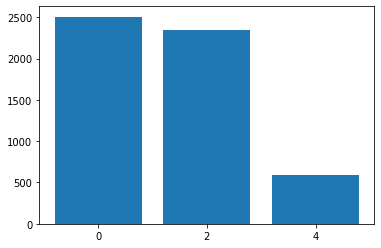

In [11]:
grade_count = df_temp['KL_Grade'].value_counts().sort_index()
plt.bar(range(len(grade_count)), grade_count.values, align='center')
plt.xticks(range(len(grade_count)), grade_count.index.values)

# grade_counts = pd.DataFrame(grade_count)
# grade_counts
# grade_counts = grade_counts.astype(np.int16)
# grade_counts.columns=['counts']  
# grade_counts

In [12]:
import os
from glob import glob # 이미지 경로, 확장명만 알려주고 불러오는 함수 

In [13]:
os.getcwd()

'C:\\PythonAI_Project\\Workspace'

In [14]:
image_dir = '../../labelling/'
bbox_dir = '../../labelling/'

In [15]:
image_files=glob(image_dir + '*.jpg')
len(image_files)

8261

In [16]:
bbox_files = glob(bbox_dir + "*.xml")
len(bbox_files)

8261

In [17]:
import cv2   # 영상이나 이미지를 다룰때 필수로 이용하는 라이브러리 openCV
import xml.etree.ElementTree as et   # 파싱하는 용도 xml 파일을 분석하기 위한 라이브러리
from matplotlib.patches import Rectangle # 박스 쳐주는 도구

In [18]:
# 임의의 파일 설정
test = 40

image_path = image_files[test]  #test 파일 임의 설정
bbox_path = bbox_files[test]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(bbox_path)
tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

In [19]:
#!pip install sklearn

In [20]:
from sklearn.model_selection import KFold

In [21]:
''' KFold 속성  // data를 분류해주는 작업 // 숫자를 적어주지 않으면 매번 분류가 달라지기 때문에 숫자를 고정해줘야 매번 같은 data로 분류됨
 n_split : 몇개로 분할할지  // 보통 3, 5, 10 을 사용한다.
 shuffle : Fold를 나누기 전에 무작위로 섞을지
 random_state : 나눈 Fold를 그대로 사용할지
'''
#kf = KFold(n_splits=5, shuffle=True, random_state=42) kf = KFold(n_splits=5, shuffle=True, random_state=42)  
# df['fold'] = -1  #초기화
# ''' 저 t,v 가 train / validation 의 약자 인가요? for문 해석좀 해주세요.   // split을 많이 하면 할수록 유리한가?'''
# for idx, (t,v) in enumerate(kf.split(df),1):            
#     print(t,v, len(v))
#     df.loc[v,'fold'] = idx

pass

In [22]:
# print(len(df[df['fold']==1]))  # 하나의 분류에 몇개가 들어가있는가
# print(len(df[df['fold']!=1]))

In [23]:
# grade_counts=df[df['fold'] == 1]['grade'].value_counts().sort_index()
# grade_counts
# plt.bar(range(len(grade_counts)), grade_counts.values, align='center')
# plt.xticks(range(len(grade_counts)),grade_counts.index.values)

# plt.tight_layout()
# plt.show()

In [24]:
from sklearn.model_selection import StratifiedKFold

In [25]:
# n_split : 몇개로 분할할지
# shuffle : Fold를 나누기 전에 무작위로 섞을지
# random_state : 나눈 Fold를 그대로 사용할지
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df_temp, df_temp['KL_Grade']), 1):
    print(t, v, len(v))
    df_temp.loc[v, 'fold'] = idx
    
    

[   0    2    3 ... 5448 5449 5451] [   1   11   12 ... 5444 5445 5450] 1091
[   0    1    2 ... 5448 5450 5451] [   8   13   14 ... 5442 5446 5449] 1091
[   0    1    2 ... 5449 5450 5451] [   3    7    9 ... 5435 5441 5447] 1090
[   0    1    2 ... 5447 5449 5450] [   5    6   10 ... 5443 5448 5451] 1090
[   1    3    5 ... 5449 5450 5451] [   0    2    4 ... 5430 5432 5439] 1090


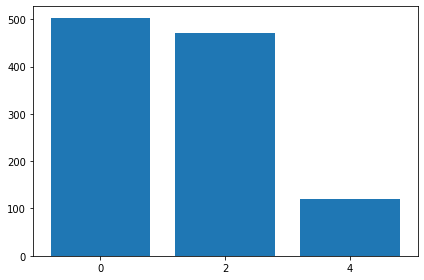

In [26]:
value_counts = df_temp[df_temp['fold'] ==1]['KL_Grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

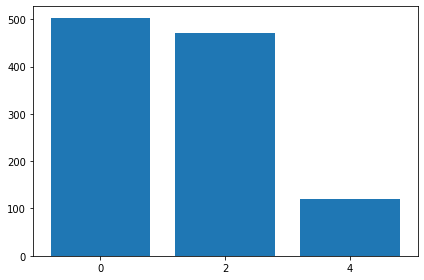

In [27]:
value_counts = df_temp[df_temp['fold'] ==2]['KL_Grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

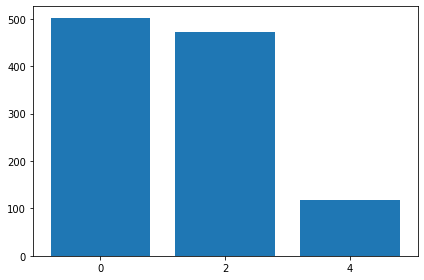

In [28]:
value_counts = df_temp[df_temp['fold'] ==3]['KL_Grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

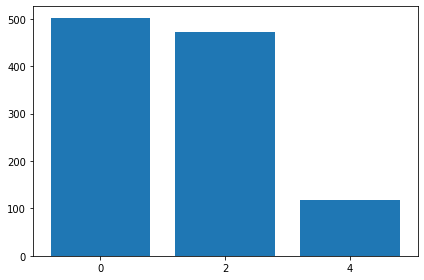

In [29]:
value_counts = df_temp[df_temp['fold'] ==4]['KL_Grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

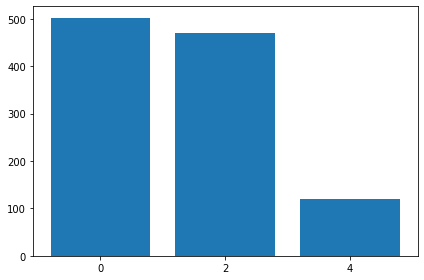

In [30]:
value_counts = df_temp[df_temp['fold'] ==5]['KL_Grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [32]:
df_temp.to_csv('./data/grade/temp_kfold_024.csv', index=False) # 저장하기